In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
from matplotlib import cm
import matplotlib as mpl
from cycler import cycler
from matplotlib import rc
import scipy.stats
from sklearn.metrics import explained_variance_score
from tqdm import tnrange

In [3]:
true_diff = np.load("/scratch/yjk27/CA1_clust4-60/data/V_diff_stimseed1_set1.npy")[-50000*20:].reshape(20,50000)
one_diff_test = np.load("/scratch/yjk27/CA1_clust4-60/hand/glm_s10_h1_output.npz")["test"]
two_diff_test = np.load("/scratch/yjk27/CA1_clust4-60/hand/glm_s10_h2_output.npz")["test"]
gru_diff_test = np.load("/scratch/yjk27/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]
gru_dend_diff_test = np.load("/scratch/yjk27/CA1_clust4-60/hand/gru_dend_s5_h20_output.npz")["test"]

In [4]:
var_exp = np.zeros((20,4))

for i in range(20):
    var_exp[i,0] = explained_variance_score(true_diff[i], one_diff_test[i])
    var_exp[i,1] = explained_variance_score(true_diff[i], two_diff_test[i])
    var_exp[i,2] = explained_variance_score(true_diff[i], gru_diff_test[i])
    var_exp[i,3] = explained_variance_score(true_diff[i], gru_dend_diff_test[i])
    
thresh_bin_no = 200

diff_means = np.zeros((thresh_bin_no, 5))
diff_stds = np.zeros((thresh_bin_no, 5))
diff_bins = np.linspace(np.min(true_diff), np.max(true_diff), thresh_bin_no+1)

for i in range(thresh_bin_no):
    diff_idx = np.where((true_diff.flatten() >= diff_bins[i]) & (true_diff.flatten() < diff_bins[i+1]))[0]
    diff_means[i,1] = np.mean(one_diff_test.flatten()[diff_idx])
    diff_means[i,2] = np.mean(two_diff_test.flatten()[diff_idx])
    diff_means[i,3] = np.mean(gru_diff_test.flatten()[diff_idx])
    diff_means[i,4] = np.mean(gru_dend_diff_test.flatten()[diff_idx])
    diff_means[i,0] = (diff_bins[i] + diff_bins[i+1])/2
    diff_stds[i,0] = (diff_bins[i] + diff_bins[i+1])/2
    diff_stds[i,1] = np.std(one_diff_test.flatten()[diff_idx])
    diff_stds[i,2] = np.std(two_diff_test.flatten()[diff_idx])
    diff_stds[i,3] = np.std(gru_diff_test.flatten()[diff_idx])
    diff_stds[i,4] = np.std(gru_dend_diff_test.flatten()[diff_idx])

/scratch/yjk27/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/yjk27/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/scratch/yjk27/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/scratch/yjk27/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/scratch/yjk27/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


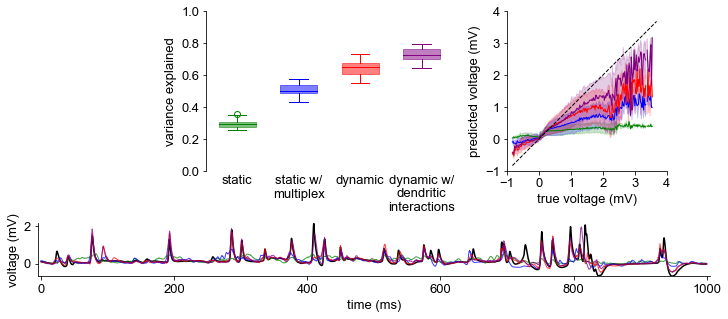

In [ ]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '13'

fig = plt.figure(constrained_layout=True, figsize = (10,6))
gs = fig.add_gridspec(6,5, wspace=0, hspace=0)
ax1 = fig.add_subplot(gs[:3,1:3])
ax2 = fig.add_subplot(gs[:3,3:5])
ax3 = fig.add_subplot(gs[3,:])

colors = ["green", "blue", "red", "purple"]
cap_colors = ["green", "green", "blue", "blue", "red", "red", "purple", "purple"]

bp = ax1.boxplot(var_exp, positions = [1,2,3,4], widths = 0.6, patch_artist=True)
for i in range(var_exp.shape[1]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(var_exp.shape[1]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
ax1.set_xticklabels(["static", "static w/\nmultiplex", "dynamic", "dynamic w/\ndendritic\ninteractions"])
ax1.set_ylim(0,1)
ax1.margins(x=0.005, y=0.005)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_bounds((0,1))
ax1.spines["bottom"].set_visible(False)
ax1.tick_params(axis="x", length=0)
ax1.set_ylabel("variance explained")

#############

ax2.plot(diff_means[:,0],diff_means[:,1], linewidth=1, color="green")
ax2.plot(diff_means[:,0],diff_means[:,2], linewidth=1, color="blue")
ax2.plot(diff_means[:,0],diff_means[:,3], linewidth=1, color="red")
ax2.plot(diff_means[:,0],diff_means[:,4], linewidth=1, color="purple")
ax2.fill_between(diff_means[:,0], diff_means[:,1]-diff_stds[:,1], diff_means[:,1]+diff_stds[:,1], color="green", alpha=0.2)
ax2.fill_between(diff_means[:,0], diff_means[:,2]-diff_stds[:,2], diff_means[:,2]+diff_stds[:,2], color="blue", alpha=0.2)
ax2.fill_between(diff_means[:,0], diff_means[:,3]-diff_stds[:,3], diff_means[:,3]+diff_stds[:,3], color="red", alpha=0.2)
ax2.fill_between(diff_means[:,0], diff_means[:,4]-diff_stds[:,4], diff_means[:,4]+diff_stds[:,4], color="purple", alpha=0.2)
ax2.plot(diff_means[:,0], diff_means[:,0], linewidth=1, color="black", linestyle="--")
ax2.margins(x=0.005, y=0.005)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.set_xlabel("true voltage (mV)")
ax2.set_ylabel("predicted voltage (mV)")
ax2.set_yticks(np.arange(-1,4.1,1))
ax2.set_xticks(np.arange(-1,4.1,1))
xleft, xright = ax2.get_xlim()
ybottom, ytop = ax2.get_ylim()
ax2.set_aspect(abs((xright-xleft)/(ybottom-ytop)))

###############

ax3.plot(np.arange(0,1000,0.2), true_diff[0,21000:26000], linewidth=1.5, color="black")
ax3.plot(np.arange(0,1000,0.2), one_diff_test[0,21000:26000], linewidth=1, color="green", alpha=0.75)
ax3.plot(np.arange(0,1000,0.2), two_diff_test[0,21000:26000], linewidth=1, color="blue", alpha=0.75)
ax3.plot(np.arange(0,1000,0.2), gru_diff_test[0,21000:26000], linewidth=1, color="red", alpha=0.75)
ax3.plot(np.arange(0,1000,0.2), gru_dend_diff_test[0,21000:26000], linewidth=1, color="purple", alpha=0.75)


ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.set_ylabel("voltage (mV)")
ax3.set_xlabel("time (ms)")
ax3.margins(x=0.005, y=0.005)


#plt.show()
#fig.savefig("/scratch/yjk27/dendrite/fig_dend_interact/fig_dend_interact_raw.pdf", bbox_inches="tight", transparent=True)